<a href="https://colab.research.google.com/github/Jibby2k1/DevOSC/blob/master/SentimentSignal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

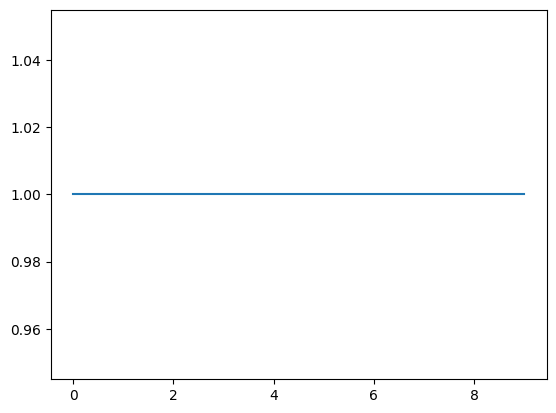

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import kaiserord, firwin, freqz, lfilter, stft
from scipy.fft import fft, ifft, fftfreq
import librosa
test = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
time = np.arange(10);
plt.plot(time, test)

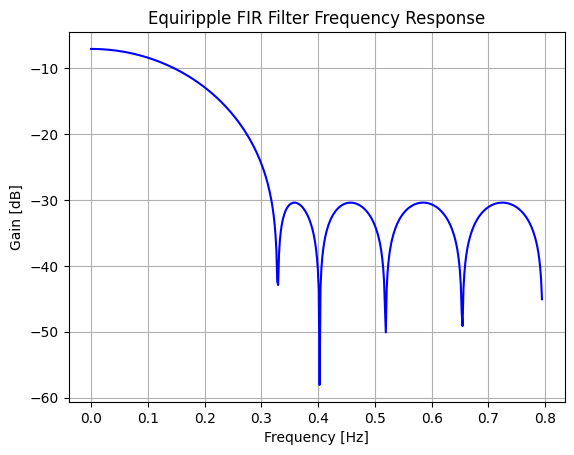

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import remez, freqz

# Parameters for the equiripple filter design
fs = 10
cutoff_freq = 1
transition_width = 1  # Width of the transition band in Hz

# Calculate the number of taps for the equiripple filter design
nyquist = 0.5 * fs

# Design the equiripple FIR filter
#we are using the kaiser # of taps
taps = remez(numtaps = 10,
             bands = [0, cutoff_freq, (cutoff_freq + transition_width), nyquist],
             desired = [1, 0],
             weight = [1, 1000], #this prioritizes minimizing error in the stopband
             fs=fs,
             maxiter = 1000)

# Plot the frequency response of the equiripple filter
w, h = freqz(taps, fs=fs)
plt.plot( w / (2 * np.pi), 10 * np.log10(np.abs(h)), 'b')
plt.title('Equiripple FIR Filter Frequency Response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Gain [dB]')
plt.grid()
plt.show()


In [38]:
norm_taps = taps/np.linalg.norm(taps)
print(norm_taps)
taps_sum = np.sum(norm_taps)
print(taps_sum)

[0.04174125 0.12977557 0.26427815 0.40558056 0.49706885 0.49706885
 0.40558056 0.26427815 0.12977557 0.04174125]
2.6768887497449967


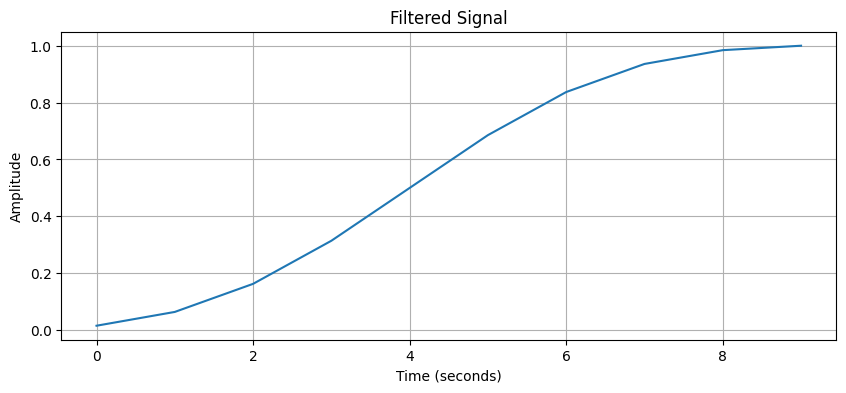

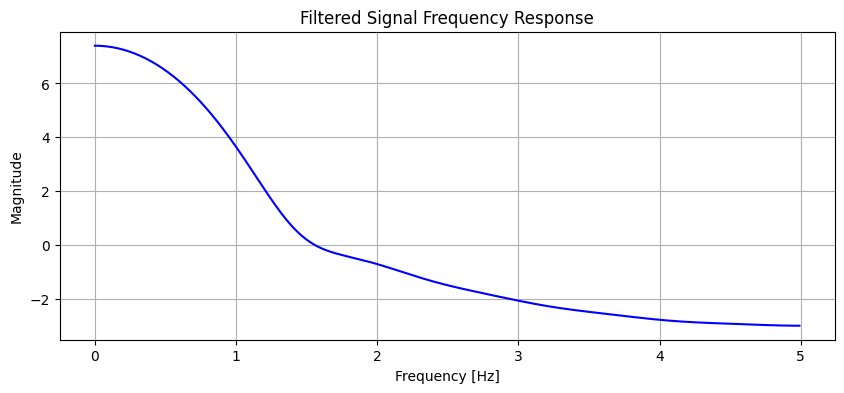

In [41]:
output_signal = lfilter(norm_taps, taps_sum, test)
w, h = freqz(output_signal, fs=fs)

# Plot the filtered audio signal
plt.figure(figsize=(10, 4))
plt.plot(time, output_signal)
plt.title('Filtered Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Plot the frequency response of the audio
plt.figure(figsize=(10, 4))
plt.plot(w, 10 * np.log10(np.abs(h)), 'b')
plt.title('Filtered Signal Frequency Response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid()
plt.show()